In [1]:
#import libries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read file from the csv as a dataframe and display the data
air_quality=pd.read_csv('../data/Climate Change - datasets/Air Quality Index.csv')
air_quality

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
18116,2025-03-06,United States of America,Moderate,82
18117,2025-03-06,Uzbekistan,Good,17
18118,2025-03-06,Vatican,Moderate,65
18119,2025-03-06,Venezuela,Good,11


### explain column names

In [3]:
#function to check understand the dataset:
def data_understanding(df): 
    print('Check the number of rows and columns')
    print(f'The dataset has {df.shape[0]} rows')
    print(f'The dataset has {df.shape[1]} columns\n')
    
    print('Check data info')
    print(df.info())  # Includes column types and missing values
    print('\n')

    print('Check missing values')
    print(df.isna().sum())  # Shows missing values per column
    print('\n')

    print('Check data statistics (numeric)')
    print(df.describe())  # Summary statistics for numerical data
    print('\n')

    print('Check data statistics (categorical)')
    print(df.describe(include='O'))  # Summary for categorical data
    print('\n')

    print('Check for duplicates')
    print(f'Duplicates: {df.duplicated().sum()}')  # Number of duplicate rows

# Call the function
data_understanding(air_quality)


Check the number of rows and columns
The dataset has 18121 rows
The dataset has 4 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18121 entries, 0 to 18120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18121 non-null  object
 1   Country    18121 non-null  object
 2   Status     18121 non-null  object
 3   AQI Value  18121 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 566.4+ KB
None


Check missing values
Date         0
Country      0
Status       0
AQI Value    0
dtype: int64


Check data statistics (numeric)
          AQI Value
count  18121.000000
mean      63.708515
std       50.174970
min        1.000000
25%       29.000000
50%       53.000000
75%       83.000000
max      963.000000


Check data statistics (categorical)
              Date Country Status
count        18121   18121  18121
unique         125     142      6
top     2022-07-22   Kenya   Good
freq      

In [4]:
print(f'The dataset has {air_quality.shape[0]} rows')
print(f'The dataset has {air_quality.shape[1]} columns')

The dataset has 18121 rows
The dataset has 4 columns


In [5]:
#data info
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18121 entries, 0 to 18120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18121 non-null  object
 1   Country    18121 non-null  object
 2   Status     18121 non-null  object
 3   AQI Value  18121 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 566.4+ KB


no missing values in the dataset, date is object we will need to convert to date format.coutry and status to be one hot encoded prior to modelling

In [6]:
#confirm no missing values
air_quality.isna().sum()

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

In [7]:
#check data statistics
air_quality.describe()

,AQI Value
count,18121.000000
mean,63.708515
std,50.174970
min,1.000000
25%,29.000000
50%,53.000000
75%,83.000000
max,963.000000


aqi - standardized measure of air pollution levels
0–50	Good	Air quality is excellent, no health risks.
51–100	Moderate	Acceptable air quality, but some sensitive groups may experience minor issues.
101–150	Unhealthy for Sensitive Groups	People with respiratory issues (asthma, elderly, children) may be affected.
151–200	Unhealthy	Everyone may start experiencing health effects, sensitive groups more at risk.
201–300	Very Unhealthy	Health warnings issued, serious effects on entire population.
301+	Hazardous	Emergency conditions, serious health risks.

on average there us moderate aqi levels (53) close to excellent air quality.
max is 963 is it an outlier

In [8]:
#check airquality > 300  which is harzadeous
print(air_quality.query('`AQI Value`>300').sort_values(by='AQI Value')['Country'].value_counts())
air_quality.query('`AQI Value`>300').sort_values(by='AQI Value')

India                       17
Burkina Faso                 9
Iraq                         7
Germany                      7
United States of America     7
Ethiopia                     4
China                        4
Bangladesh                   4
United Arab Emirates         3
Kuwait                       3
Chad                         3
Zambia                       2
Netherlands                  2
Thailand                     2
Myanmar                      2
Nepal                        1
Chile                        1
Gabon                        1
Iran                         1
Cambodia                     1
Uganda                       1
Uzbekistan                   1
Name: Country, dtype: int64


,Date,Country,Status,AQI Value
11120,2023-05-18,Burkina Faso,Hazardous,301
17067,2025-01-09,India,Hazardous,303
10706,2023-04-27,Burkina Faso,Hazardous,303
13899,2024-07-11,United States of America,Hazardous,303
10287,2023-04-06,Burkina Faso,Hazardous,304
...,...,...,...,...
16214,2024-11-21,India,Hazardous,569
4435,2022-08-16,Iraq,Hazardous,590
4224,2022-08-14,United Arab Emirates,Hazardous,862
4365,2022-08-15,United Arab Emirates,Hazardous,868


highest aqi recorded in china, followed by united Emirates. Country with the highest numbe rof iqa levels i.e> 300 is India, followed by burkina faso and Iraq respectively

In [9]:
#check data statistics for strings
air_quality.describe(include = 'O')

,Date,Country,Status
count,18121,18121,18121
unique,125,142,6
top,2022-07-22,Kenya,Good
freq,423,134,8542


**most common (top)**

date 2022-07-22 with 423 records
country kenya with 134 records
status good appearing 8542 times

In [10]:
#check for duplicates
print(air_quality.duplicated().sum())
#checking theduplicates
air_quality[air_quality.duplicated(keep=False)].sort_values(by=['Date','Country','Status','AQI Value'])

300


,Date,Country,Status,AQI Value
1,2022-07-21,Algeria,Moderate,65
143,2022-07-21,Algeria,Moderate,65
10,2022-07-21,Bangladesh,Unhealthy for Sensitive Groups,141
152,2022-07-21,Bangladesh,Unhealthy for Sensitive Groups,141
18,2022-07-21,Brunei,Good,15
...,...,...,...,...
13249,2024-06-06,Venezuela,Good,10
13117,2024-06-06,Vietnam,Moderate,63
13250,2024-06-06,Vietnam,Moderate,63
13118,2024-06-06,Zambia,Unhealthy for Sensitive Groups,140


In [11]:
#drop duplicates
air_quality.drop_duplicates(inplace=True)
#confirm drop
len(air_quality)

17821

In [12]:
#function to check understand the dataset:
def data_understanding(df): 
    print('Check the number of rows and columns')
    print(f'The dataset has {df.shape[0]} rows')
    print(f'The dataset has {df.shape[1]} columns\n')
    
    print('Check data info')
    print(df.info())  # Includes column types and missing values
    print('\n')

    print('Check missing values')
    print(df.isna().sum())  # Shows missing values per column
    print('\n')

    print('Check data statistics (numeric)')
    print(df.describe())  # Summary statistics for numerical data
    print('\n')

    print('Check data statistics (categorical)')
    print(df.describe(include='O'))  # Summary for categorical data
    print('\n')

    print('Check for duplicates')
    print(f'Duplicates: {df.duplicated().sum()}')  # Number of duplicate rows

# Call the function
data_understanding(air_quality)


Check the number of rows and columns
The dataset has 17821 rows
The dataset has 4 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17821 entries, 0 to 18120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       17821 non-null  object
 1   Country    17821 non-null  object
 2   Status     17821 non-null  object
 3   AQI Value  17821 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 696.1+ KB
None


Check missing values
Date         0
Country      0
Status       0
AQI Value    0
dtype: int64


Check data statistics (numeric)
          AQI Value
count  17821.000000
mean      63.643005
std       50.072823
min        1.000000
25%       29.000000
50%       53.000000
75%       83.000000
max      963.000000


Check data statistics (categorical)
              Date Country Status
count        17821   17821  17821
unique         125     142      6
top     2022-07-22  Taiwan   Good
freq      

In [13]:
#convert date to datetime
air_quality['Date']  = pd.to_datetime(air_quality['Date'],format = '%Y/%m/%d')
#check if date been converted to datetime
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17821 entries, 0 to 18120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       17821 non-null  datetime64[ns]
 1   Country    17821 non-null  object        
 2   Status     17821 non-null  object        
 3   AQI Value  17821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 696.1+ KB


### EDA

### Air quality trends over time

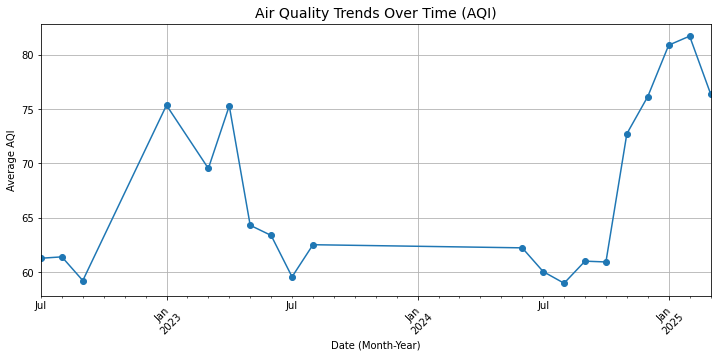

In [32]:
# Aggregate AQI values by month or year
# monthly_aqi = air_quality.groupby(air_quality['Date'].dt.to_period('m'))['AQI Value'].mean()
monthly_aqi = air_quality.groupby(air_quality['Date'].dt.to_period('m'))['AQI Value'].mean()
# Plot AQI trends over time
plt.figure(figsize=(12,5))
monthly_aqi.plot(marker='o')
plt.title('Air Quality Trends Over Time (AQI)', fontsize=14)
plt.xlabel('Date (Month-Year)')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Fluctuating AQI Levels:

The AQI values fluctuate over time, showing multiple peaks and drops.
There are significant increases around January 2023 and January 2025, indicating seasonal or external factors affecting air quality.
Stable Periods:

Between mid-2023 and mid-2024, the AQI remained relatively stable, staying between 60-65.
This suggests a period of relatively consistent air quality.
Sharp Rise in Late 2024 - Early 2025:

Around late 2024, AQI starts increasing rapidly, reaching its peak in early 2025 (over 80).
This suggests a period of worsening air quality, possibly due to environmental or human-driven factors (e.g., pollution, seasonal changes).
Recent Decline in 2025:

After the highest AQI peak, there's a slight drop, indicating some improvement in air quality.

### Countries with the worse air quality

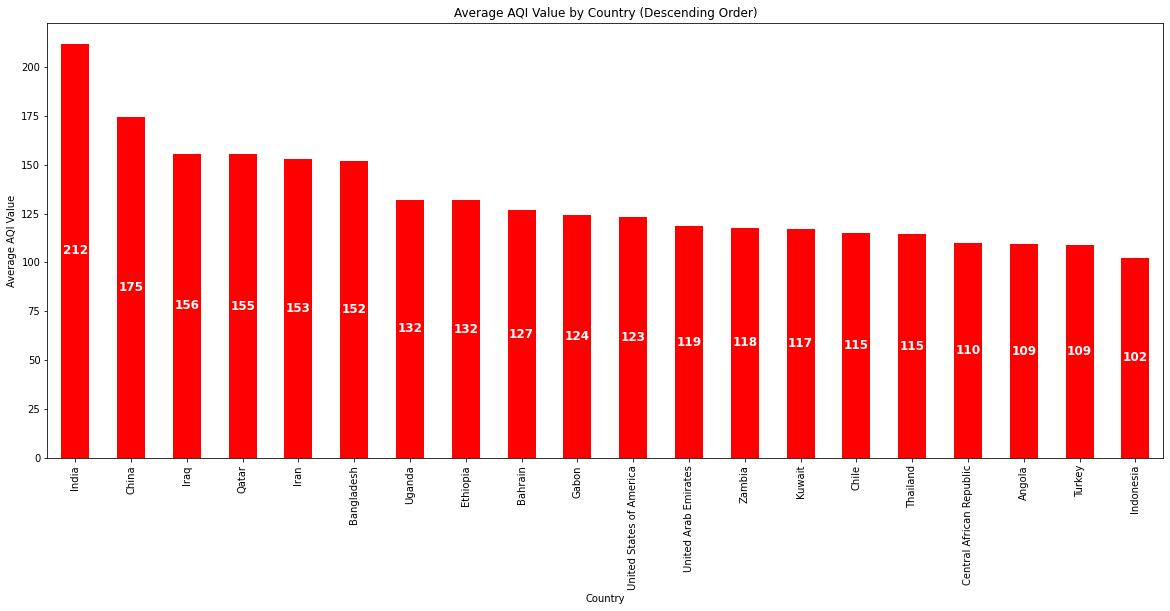

In [66]:
plt.figure(figsize=(20,8))
#get top 20
country_quality = air_quality.groupby(['Country'])['AQI Value'].mean().sort_values(ascending=False).head(20)
ax = country_quality.plot(kind='bar',color='r')
# Add labels inside bars
# Add labels inside bars (correct container)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=12, color='white', fontweight='bold')

plt.xlabel("Country")
plt.ylabel("Average AQI Value")
plt.title("Average AQI Value by Country (Descending Order)");

India has on average the worst air quality followed by china,iraq and qatar respectively

### category

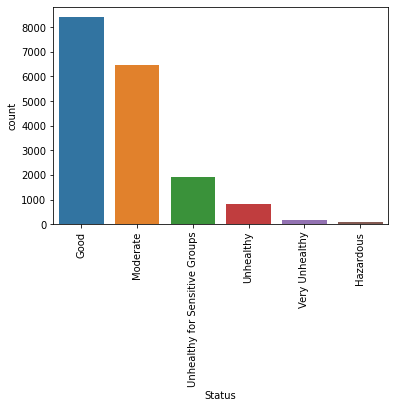

In [67]:
sns.countplot(data=air_quality,x='Status')
plt.xticks(rotation=90);

good air quality overall and harzadous few times

In [ ]:
source_industry = pd.read_csv('../data/Climate Change - datasets/co2-emissions-by-sector.csv')

In [16]:
source_industry['Annual CO₂ emissions from other industry'].value_counts(dropna=False,normalize=True)

NameError: name 'source_by_country' is not defined

In [ ]:
source_industry['Entity'].value_counts()

In [ ]:
source_industry.query('Entity=="Kenya"')

In [ ]:
pd.read_csv('../data/Climate Change - datasets/co2-emissions-by-sector.csv')

In [ ]:
pd.read_csv('../data/Climate Change - datasets/co2-emissions-by-sector.csv')

In [ ]:
Global_sea_level_rise['year'].max()

In [ ]:
pd.read_csv('../data/Climate Change - datasets/green house gas-emissions-by-sector.csv')

In [ ]:
per_capita_co2 = pd.read_csv('../data/Climate Change - datasets/per-capita-co2-vs-average.csv')
per_capita_co2

In [ ]:
total_greenhouse_gas_emissions = pd.read_csv('../data/Climate Change - datasets/total-greenhouse gas-emissions.csv')
total_greenhouse_gas_emissions

In [ ]:
total_greenhouse_gas_emissions.Code.value_counts(dropna=False)

In [ ]:
per_capita_co2['Entity']

In [ ]:
total_greenhouse_gas_emissions.query('Year==1949')

In [ ]:
pd.merge(per_capita_co2, total_greenhouse_gas_emissions, on=['Code','Year'], how='inner').query('Year==1949')